# Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.<br> You would like to use this data to help you select which city to expand to next. <br>

The file <strong><em>ex1data1.csv</em></strong> contains the dataset for our linear regression problem.<br> 
1. First Column = <strong>population of a city</strong> 
2. Second column = <strong>profit of a food truck in that city</strong>

A negative value for profit indicates a loss.<br>
<br> <br>
<strong>
Our assignment has these sections:
1. Plotting the Data
    1. Loading dataset
    2. Ploting scatter
2. Gradient Descent
    1. Update Equations
    2. Implementation
    3. Computing the cost J(θ)
    4. Gradient descent
    5. Visualization of Fitted Model
3. Visualization J(θ)
    1. Surface
    2. Contour
</strong>

In each section full description provided.

## 1. Plotting Dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a<br> 2-d plot.)

### 1.A Loading Dataset
We just need to import our data in file to a good structrue to work on it. So best option for us in python is <strong>Pandas</strong>.

In [181]:
# import library
import pandas as pd
dataset = pd.read_csv('ex1data1.csv',names = ['population','profit'])
dataset.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [182]:
# splitting to x and y variables for features and target variable
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values
print('x[0] ={}, y[0] ={}'.format(x[0],y[0]))
print('number of training examples = {}'.format(len(x)))

x[0] =6.1101, y[0] =17.592
number of training examples = 97


### 1.B Plotting Scatter
In this step we plot our data in 2D scatter.

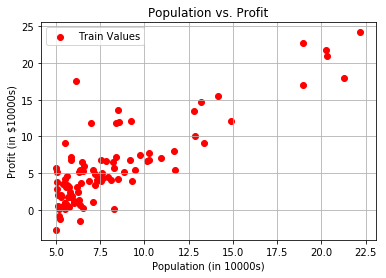

In [183]:
#import library
import matplotlib.pyplot as plt
%matplotlib inline

# visualize our data
plt.scatter(x,y, color ='red', label='Train Values')
plt.title('Population vs. Profit')
plt.xlabel('Population (in 10000s)')
plt.ylabel('Profit (in $10000s)')
plt.legend()
plt.grid()
plt.show()


## 2. Gradinet Descent
In this part, you will fit the linear regression parameters θ to our dataset
using gradient descent.

### 2.A Update Equation
The objective of linear regression is to minimize the cost function: <img src='img/j.jpg'>
where the hypothesis hθ(x) is given by the linear model: <img src='img/h.jpg'>
Recall that the parameters of your model are the θj values. These are the values you will adjust to minimize cost J(θ). One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update: !<img src='img/thta.jpg'><br>
With each step of gradient descent, your parameters θj come closer to the optimal values that will achieve the lowest cost J(θ).<br>

### 2.B Implementation
<strong>Implementation Note:</strong> We store each example as a row in the the <strong>x</strong> matrix in python. To take into account the intercept term <strong>(θ<sub>0</sub>)</strong>, we add an additional first column to <strong>x</strong> and set it to all <strong>ones</strong>. This allows us to treat <strong>(θ<sub>0</sub>)</strong> as simply another <strong>feature</strong>.<br><br>
In the following lines, we add another dimension to our data to accommodate the <strong>(θ<sub>0</sub>)</strong> intercept term. We also initialize the <strong>initial parameters to 0</strong> and the learning rate <strong>alpha to 0.01</strong>.

In [184]:
# import library
import numpy as np

# appending ones to our x 
z = np.ones((len(x),1))
x = np.reshape(x,(-1,1))
x = np.append(z,x,axis =1)

In [185]:
print('x.shape = {}, x[0] = {}'.format(x.shape,x[0]))

x.shape = (97, 2), x[0] = [ 1.      6.1101]


In [186]:
# n is the number of features and m is the number of samples of training set
n = x.shape[1]
m = x.shape[0]

# define theta as zero
theta = np.zeros(n)
theta = theta.reshape(len(theta),1)
y = y.reshape(len(y),1)

# iterations to update theta and minimize J
iterations = 1500

# alpha the learning rate in gradient descent update formula
alpha = 0.01

### 2.C Compute Cost J(θ)
As you perform gradient descent to learn minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation.

<strong>compute_cost(x, y, theta)</strong> computes the cost of using theta as the parameter for linear regression to fit the data points in x and y.
To calculate this function, we need hypothesis <strong>h<sub>θ</sub>(x)</strong> as mentioned in the previous section.

In [187]:
def hypothesis(x,theta):
    return np.dot(x,theta)

In [188]:
def compute_cost(x, y, theta):
    loss = hypothesis(x,theta)-y
    cost = np.sum(loss ** 2)/(2*m)
    return cost,loss

In [189]:
# in this step, in the doc, they say the value should be 32.07, but it is impossible and 3111.0551 is the correct value
compute_cost(x,y,theta)[0]

32.072733877455676

### 2.D Gradient Descent
Keep in mind that the cost <strong>J(θ)</strong> is parameterized by the vector <strong>θ</strong>, not <strong>x</strong> and <strong>y</strong>. That is, we minimize the value of <strong>J(θ)</strong> by changing the values of the vector <strong>θ</strong>, not by changing <strong>x</strong> or <strong>y</strong>.
A good way to verify that gradient descent is working correctly is to look at the value of <strong>J(θ)</strong> and check that it is decreasing with each step and your value of <strong>J(θ)</strong> should never increase, and should converge to a steady value by the end of the algorithm.

<strong>gradient_descent(x, y, theta, alpha, iterations)</strong> updates theta by taking iterations gradient steps with learning rate alpha.

In [193]:
# here we define z value for z axis of 3D surface and Contour diagram
z = np.zeros(iterations+1)
def gradient_descent(x,x_tran,y,theta,alpha,iterations):
    for i in range(iterations):
        cost,loss = compute_cost(x,y,theta)
        z[i] = cost
        if (i%50 == 0):
            print('Iteration #{} ====== cost = {}\n'.format(i,cost))
        gradient = np.dot(x_tran,(loss))
        theta = theta - alpha*(gradient/m)
    return theta

In [194]:
x_transposed = x.transpose()
theta = gradient_descent(x,x_transposed,y,theta,alpha,iterations+1)

Iteration #0 ====== cost = 32.072733877455676

Iteration #50 ====== cost = 5.678292570015292

Iteration #100 ====== cost = 5.479975580535112

Iteration #150 ====== cost = 5.3143972362329235

Iteration #200 ====== cost = 5.176152962891966

Iteration #250 ====== cost = 5.060730386394342

Iteration #300 ====== cost = 4.964362046184745

Iteration #350 ====== cost = 4.883902423149523

Iteration #400 ====== cost = 4.816725268028978

Iteration #450 ====== cost = 4.760637879102053

Iteration #500 ====== cost = 4.713809531116866

Iteration #550 ====== cost = 4.674711719345328

Iteration #600 ====== cost = 4.642068268292856

Iteration #650 ====== cost = 4.6148136765821555

Iteration #700 ====== cost = 4.592058338363686

Iteration #750 ====== cost = 4.573059506059272

Iteration #800 ====== cost = 4.557197046645756

Iteration #850 ====== cost = 4.543953200149625

Iteration #900 ====== cost = 4.532895679657962

Iteration #950 ====== cost = 4.523663561220222

Iteration #1000 ====== cost = 4.51595550

Our final values for <strong>θ</strong> will also be used to make predictions on profits in areas of <strong>35,000</strong> and <strong>70,000</strong> people.

In [195]:
# make prediction
predict_1 = np.dot([1,3.5],theta)
predict_2 = np.dot([1,7],theta)
print('profit prediction on 35000 people = {}, profit prediction on 75000 people = {}'.format(predict_1,predict_2))

profit prediction on 35000 people = [ 0.45166649], profit prediction on 75000 people = [ 4.53410299]


### 2.E Visualization of Fitted Model
In this step we visualize our predicted data beside other data and our fitted model which is linear based on linear regression.
We can see our model predicted very good.

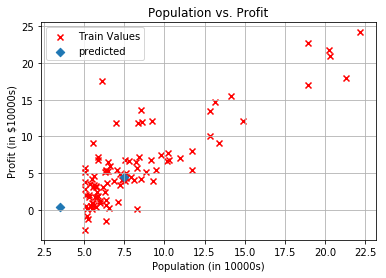

In [196]:
# visualize our data with predicted values
plt.scatter(x[:,1].reshape(len(x),1),y, color ='red', label='Train Values', marker='x')
plt.scatter([3.5,7.5],[predict_1,predict_2], label = 'predicted',marker='D')
plt.title('Population vs. Profit')
plt.xlabel('Population (in 10000s)')
plt.ylabel('Profit (in $10000s)')
plt.legend()
plt.grid()
plt.show()

Now we visualize our fitted model which is linear regression.
You can see our predicted data is on the line.

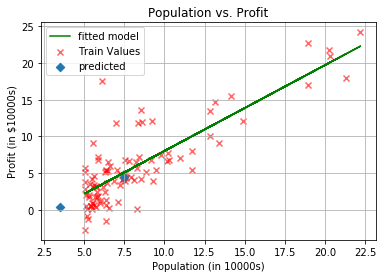

In [197]:
# visualize our data with predicted values
plt.scatter(x[:,1].reshape(len(x),1),y, color ='red', label='Train Values',alpha =0.6, marker = 'x')
plt.scatter([3.5,7.5],[predict_1,predict_2], label = 'predicted', alpha = 1,marker='D')
plt.plot(x[:,1].reshape(len(x),1),np.dot(x,theta),label = 'fitted model',color = 'green')
plt.title('Population vs. Profit')
plt.xlabel('Population (in 10000s)')
plt.ylabel('Profit (in $10000s)')
plt.legend()
plt.grid()
plt.show()

## 3. Visualization J(θ)
To understand the cost function <strong>J(θ)</strong> better, you will now plot the cost over a 2-dimensional grid of <strong>θ<sub>0</sub></strong> and <strong>θ<sub>1</sub></strong> values.
The purpose of these graphs is to show you that how <strong>J(θ)</strong> varies with changes in <strong>θ<sub>0</sub></strong> and <strong>θ<sub>1</sub></strong>. The cost function <strong>J(θ)</strong> is bowl-shaped and has a global mininum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for <strong>θ<sub>0</sub></strong> and <strong>θ<sub>1</sub></strong>, and each step of gradient descent moves closer to this point.

### 3.A Surface

Text(0.5,0.92,'Reduction of cost with theta update')

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


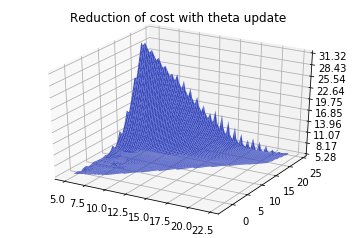

In [235]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata

# copy data
x_vis = x[:,1]
y_vis = y
z_vis = z[0:m]

# create 1D-arrays from the 2D-arrays
x_vis = x_vis.reshape(m)
y_vis = y_vis.reshape(m)
z_vis = z_vis.reshape(m)
xyz = {'x': x_vis, 'y': y_vis, 'z': z_vis}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# re-create the 2D-arrays
x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.title('Reduction of cost with theta update')

### 3.B Contour

In [345]:
import plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

data = [
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]]
    )]

py.offline.iplot(data)